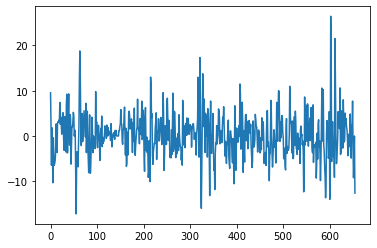

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

datos = pd.read_csv('Session5data.csv', sep=";",decimal=",")
yy = datos.iloc[:,1]

y = yy[0:655] # leave the last 5 observations to compare with the forecasted values

plt.plot(y)
plt.show()

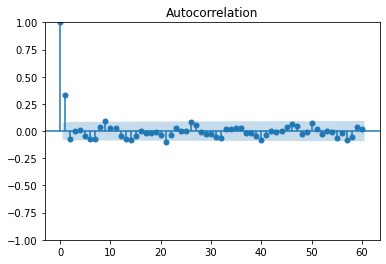

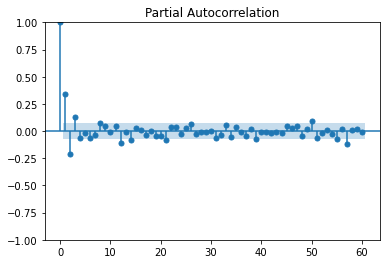

KeyError: 0

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

nlags = 60 # play with this parameter

## Aquí si pongo 72 en nlags me da este error:
# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.
# The requested nlags 72 must be < 48.
plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags,method="ols")
plt.show()


box_test = sm.stats.acorr_ljungbox(y, lags=[20])
print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) # first output "The test statistic", second output "p-value"


In [12]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

adf_test (-12.162065693043933, 1.4858156293415478e-22, 3, 651, {'1%': -3.440434903803665, '5%': -2.865989920612213, '10%': -2.569139761751388}, 3749.1061695717385)
ADF test for the original series
Statistic Value: -12.162065693043933
p-value: 1.4858156293415478e-22


In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = ARIMA(y, order = (0,0,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())
# print("Coefficients",fit_fit.params)

residuos=model_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags,method="ols")
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [10]:
adf_test = sm.tsa.stattools.adfuller(residuos,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the residuals")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

NameError: name 'residuos' is not defined

In [6]:
# Box test for autocorrelations

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[20])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -4*sigma, mu +4*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 4*std, mean + 4*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 4*std, mean + 4*std)

plt.show()

NameError: name 'residuos' is not defined

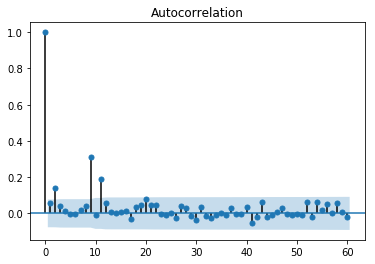

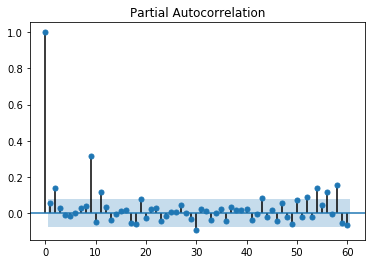

Ljung-Box for squared residuals
Statistic value [115.37638763] p_value [2.03444944e-15]


In [17]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags,method="ols")
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[20])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

point predictions [-6.25430216  0.16371619  0.16371619  0.16371619  0.16371619]
forecasting errors [4.44442145 4.93689082 4.93689082 4.93689082 4.93689082]


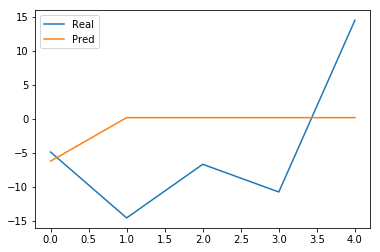

In [18]:
y_pred = model_fit.forecast(steps = 5)
print("point predictions",y_pred[0])
print("forecasting errors",y_pred[1])
# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# real =yy[655:660].reset_index(drop=True)
real =yy[-5:].reset_index(drop=True)
plt.plot(real, label = 'Real')
plt.plot(y_pred[0], label = 'Pred')
plt.legend()
plt.show()

In [19]:
std = np.std(residuos)

quantile_2_5=np.quantile(residuos, 0.025)
quantile_97_5=np.quantile(residuos, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -8.408928741803102 Upper limit 97.5%: 9.324090194499881
95% confidence intervals assuming normality
Normal Percentile 2.5%: -8.716845600854064 Normal Percentile 97.5%: 8.716845600854064
